# Evaluate the Multiple Variable Linear Regression and KNN Regression Algorithm 

In [1]:
# import the data
# sep x,y
# find out the coef , intercept
# y = m1*x1 + m2*x2 + m3*x3 + c

#KNN Regressor


# calculate r2_score
#compared

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns # analysis / visualization
from sklearn.model_selection import train_test_split as tts  # data spliting

import warnings as w
w.filterwarnings('ignore')

# Import Dataset

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
catg = df.select_dtypes('object')
cont = df.select_dtypes('number')

In [8]:
catg.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [9]:
cont.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [10]:
df.shape

(1338, 7)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()

# Seperate x,y

In [14]:
x = df.drop('charges', axis=1)
x

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [15]:
y = df['charges']

# Perform Encoding for Categorical Columns(Sex, Smoker, Region)

# One Hot Using loop

In [16]:
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
cols = [["sex", "smoker", "region"]]

for col in cols:
    one = pd.get_dummies(df1[col], drop_first=True, prefix='dummy')
    new_df1 = pd.concat([df1, one], axis=1)

In [18]:
new_df1.head()

,age,sex,bmi,children,smoker,region,charges,dummy_male,dummy_yes,dummy_northwest,dummy_southeast,dummy_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1,0,0


In [19]:
cols = [["sex", "smoker", "region"]]

for col in cols:
    one = pd.get_dummies(df2[col], drop_first=True, prefix='dummy')
    new_df1 = pd.concat([df2, one], axis=1).drop(col, axis=1)

In [20]:
new_df1

,age,bmi,children,charges,dummy_male,dummy_yes,dummy_northwest,dummy_southeast,dummy_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [21]:
Data = new_df1

In [22]:
Data

,age,bmi,children,charges,dummy_male,dummy_yes,dummy_northwest,dummy_southeast,dummy_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [23]:
#Seperate x,y

In [24]:
x = Data.drop('charges', axis='columns')

In [25]:
x

,age,bmi,children,dummy_male,dummy_yes,dummy_northwest,dummy_southeast,dummy_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


In [26]:
y = df['charges']

In [27]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

# Split the dataset into the traing set and test set

In [28]:
#train 70% ; test =30%
xtrain, xtest, ytrain, ytest = tts(x,y,test_size=.30,random_state=1)

In [29]:
xtrain.head()

,age,bmi,children,dummy_male,dummy_yes,dummy_northwest,dummy_southeast,dummy_southwest
744,50,26.41,0,1,0,1,0,0
363,21,26.40,1,0,0,0,0,1
10,25,26.22,0,1,0,0,0,0
970,50,28.16,3,0,0,0,1,0
634,51,39.70,1,1,0,0,0,1


In [30]:
xtrain.shape

(936, 8)

In [31]:
xtest.shape

(402, 8)

In [32]:
ytrain

744      8827.20990
363      2597.77900
10       2721.32080
970     10702.64240
634      9391.34600
           ...     
715     12146.97100
905      4564.19145
1096    44641.19740
235     19444.26580
1061    11554.22360
Name: charges, Length: 936, dtype: float64

In [33]:
ytest

559      1646.42970
1087    11353.22760
1020     8798.59300
460     10381.47870
802      2103.08000
           ...     
323     11566.30055
1268     1880.48700
134      2457.21115
1274    17043.34140
876     26140.36030
Name: charges, Length: 402, dtype: float64

# Multiple Variable Linear Regression

# Train the model on the training set

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
reg = LinearRegression()

In [36]:
reg.fit(xtrain, ytrain) #training

LinearRegression()

# Predict the test set results

In [37]:
ypred = reg.predict(xtest)
ypred

array([ 4.61031554e+03,  1.28878939e+04,  1.25739488e+04,  1.31978366e+04,
        6.29337182e+02,  3.23572576e+04,  1.28537784e+04,  1.22736625e+04,
        3.86516404e+03,  2.99041114e+04,  1.10305362e+04,  1.74288935e+04,
        8.67020810e+03,  8.35745971e+03,  3.36875366e+03,  1.03165857e+04,
        3.99922136e+03,  6.86650933e+03,  1.49892640e+04,  1.44001670e+04,
        1.24848600e+04,  3.32554533e+04,  9.17711110e+03,  8.96942018e+03,
        3.19978311e+03,  8.19525844e+03,  9.35574417e+03,  1.08473779e+04,
        7.69460470e+03,  4.43644785e+03,  1.40732518e+04,  5.76139449e+03,
        3.46834014e+04,  2.75058813e+04,  3.35301907e+04,  9.55351707e+03,
        3.07999586e+04,  2.68197434e+04,  1.52082623e+04,  3.42179660e+04,
        6.39728074e+03,  1.40583847e+04,  1.06124944e+04,  1.49646068e+04,
        4.19302227e+03,  1.29975937e+04,  4.50078406e+03,  2.90583927e+04,
        7.31156998e+03,  1.39664554e+04,  1.32690410e+04,  1.21999606e+04,
        2.04035422e+03,  

# Evaluate the model

In [38]:
linear_regression_accuracy=reg.score(xtest,ytest)  #Accuracy
linear_regression_accuracy

0.7405989316927213

In [39]:
m = reg.coef_
m

array([  251.68186515,   322.38910684,   344.9642553 ,  -282.79634661,
       24059.39047692,  -304.09009765,  -939.34209691,  -868.18855866])

In [40]:
c = reg.intercept_
c

-11039.23841856155

In [41]:
#import library
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [42]:
mse = mean_squared_error(ytest, ypred)
mse

36761456.352013245

In [43]:
mae = mean_absolute_error(ytest, ypred)
mae

4139.932064766011

# Plot the results

Text(0.5, 1.0, 'Actual vs. Predicted')

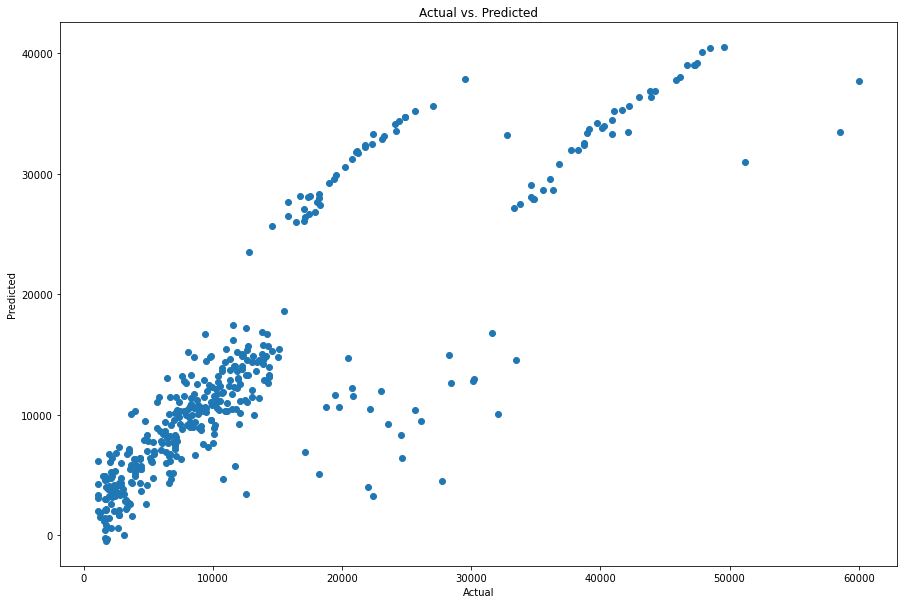

In [44]:
plt.figure(figsize=(15,10))
plt.scatter(ytest, ypred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
#plt.plot(xtrain.squeeze() , reg.predict(xtrain), color='red')

# Predicted Values

In [45]:
pred_y_df = pd.DataFrame({'Actual value':ytest, 'Predicted value':ypred, 'Difference': ytest-ypred})

In [46]:
pred_y_df 

,Actual value,Predicted value,Difference
559,1646.42970,4610.315541,-2963.885841
1087,11353.22760,12887.893880,-1534.666280
1020,8798.59300,12573.948752,-3775.355752
460,10381.47870,13197.836626,-2816.357926
802,2103.08000,629.337182,1473.742818
...,...,...,...
323,11566.30055,16224.053528,-4657.752978
1268,1880.48700,3861.767583,-1981.280583
134,2457.21115,3274.369325,-817.158175
1274,17043.34140,27065.591340,-10022.249940


In [47]:
pred_y_df [0:30]

,Actual value,Predicted value,Difference
559,1646.42970,4610.315541,-2963.885841
1087,11353.22760,12887.893880,-1534.666280
1020,8798.59300,12573.948752,-3775.355752
460,10381.47870,13197.836626,-2816.357926
802,2103.08000,629.337182,1473.742818
298,38746.35510,32357.257584,6389.097516
481,9304.70190,12853.778438,-3549.076538
616,11658.11505,12273.662540,-615.547490
763,3070.80870,3865.164045,-794.355345
750,19539.24300,29904.111392,-10364.868392


# KNN Regression (K-Nearest Neighbors Algorithm)

# Train the model on the training set 

In [48]:
#Import Library
from sklearn.neighbors import KNeighborsRegressor

In [49]:
knn = KNeighborsRegressor(n_neighbors = 50)

In [50]:
knn.fit(xtrain,ytrain)

KNeighborsRegressor(n_neighbors=50)

# Predict the test set results

In [51]:
ypred1 = knn.predict(xtest)
ypred1

array([10417.1926196 , 17316.0954574 , 18012.3564014 , 18781.950284  ,
        5596.1840332 , 12851.1992242 , 17711.2493892 , 15811.5062356 ,
        7360.9371724 ,  9556.410249  , 15366.9397336 , 21174.3921214 ,
       11848.5492476 , 12979.7704298 , 10937.4390566 , 15610.4885688 ,
        9216.0308238 ,  8477.307469  , 21956.1051602 , 23180.0461248 ,
       18296.1178228 , 13258.1556398 , 13493.0999974 , 15041.6993104 ,
       10129.36052918, 11113.470974  , 11491.084881  , 16959.22366   ,
       12032.4107032 ,  8185.3581188 , 17020.2690712 ,  8312.979119  ,
       14881.7724362 ,  9416.46617798, 14451.716472  , 14851.2563702 ,
       12006.2585754 ,  6985.7534298 , 21311.376989  , 14350.7231604 ,
       10665.1304382 , 20166.9762002 , 13760.9221908 , 21232.68722   ,
        7968.7772354 , 17690.2715452 , 11062.2116806 , 10193.0408418 ,
       14652.4473108 , 17328.0563406 , 21974.8138756 , 16206.8491204 ,
        5877.0129142 , 13628.2758462 ,  8303.70105038, 11464.0709904 ,
      

# Evaluate the model

In [52]:
knn_accuracy=knn.score(xtest,ytest)  #Accuracy
knn_accuracy

0.1386658474357294

In [53]:
MSE = mean_squared_error(ytest, ypred1)

In [54]:
MSE

122065410.3724879

In [55]:
MAE = mean_absolute_error(ytest, ypred1)
MAE

8686.24383453587

# Plot the results

Text(0.5, 1.0, 'Actual vs. Predicted')

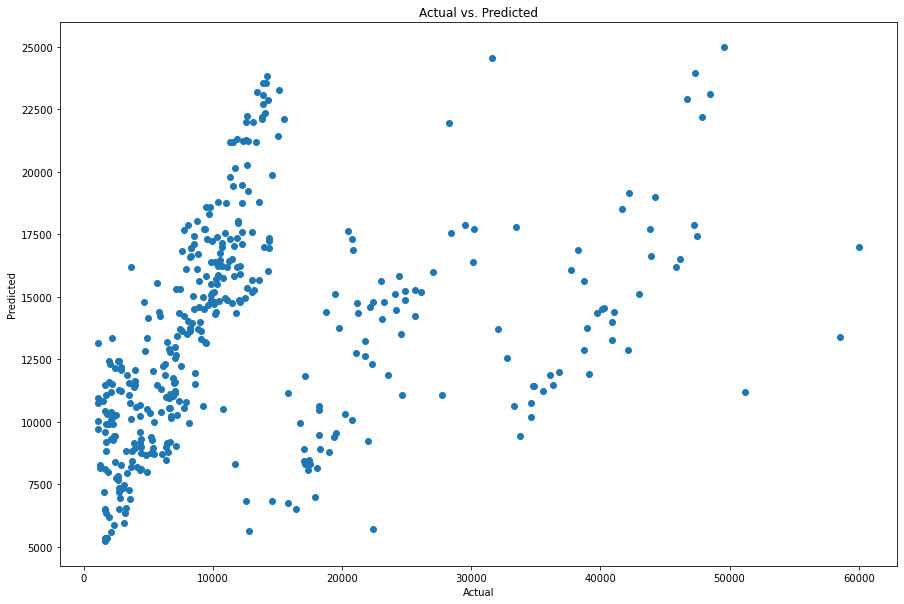

In [56]:
plt.figure(figsize=(15,10))
plt.scatter(ytest, ypred1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

# Predicted Values 

In [57]:
pred1_y_df = pd.DataFrame({'Actual value':ytest, 'Predicted value':ypred1, 'Difference': ytest-ypred1})

In [58]:
pred1_y_df

,Actual value,Predicted value,Difference
559,1646.42970,10417.192620,-8770.762920
1087,11353.22760,17316.095457,-5962.867857
1020,8798.59300,18012.356401,-9213.763401
460,10381.47870,18781.950284,-8400.471584
802,2103.08000,5596.184033,-3493.104033
...,...,...,...
323,11566.30055,19417.918107,-7851.617557
1268,1880.48700,7966.993365,-6086.506365
134,2457.21115,8374.953278,-5917.742128
1274,17043.34140,8921.772586,8121.568814


In [59]:
# Comparing Accuracy for KNN Regression & Multiple Linear Regression 

In [60]:
# Creating DataFrame for All Accuracy
accuracy_df = pd.DataFrame([['KNN Regressor', knn_accuracy], ['Multiple Variable Linear Regression', linear_regression_accuracy]], columns=['Algorithm Name', 'Accuracy'])

In [61]:
accuracy_df

,Algorithm Name,Accuracy
0,KNN Regressor,0.138666
1,Multiple Variable Linear Regression,0.740599


In [62]:
accuracy_df.nlargest(1,'Accuracy') # largest accuracy

,Algorithm Name,Accuracy
1,Multiple Variable Linear Regression,0.740599


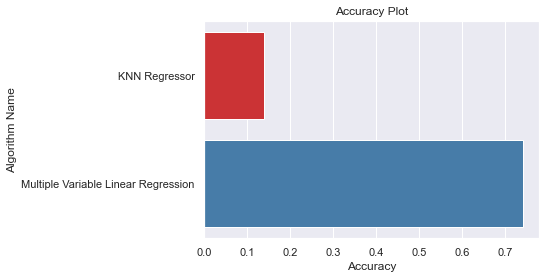

In [63]:
sns.set()
sns.barplot(y="Algorithm Name", x="Accuracy",  data=accuracy_df, palette="Set1").set(title='Accuracy Plot')
sns.set(rc={'figure.figsize':(15,10)})